In [3]:
import pandas as pd  
import numpy as np 
import matplotlib.pylab as plt 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

from sklearn import preprocessing  

%matplotlib inline  

from sklearn.decomposition import PCA  
from sklearn.impute import KNNImputer  
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix  
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error   #RMSE
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

from adjustText import adjust_text  

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)  

In [4]:
df=pd.read_csv('C:/Users/mailk/Downloads/ratings.csv')

In [5]:
df.head(10)

,userId,bookId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
5,1,70,3.0
6,2,5,3.0
7,2,45,4.0
8,2,22,2.0
9,2,3,4.5


In [6]:
df.columns = df.columns.str.strip().str.lower().str.replace('[^A-Za-z\s]+','')
df.head()

,userid,bookid,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [7]:
df.head()

,userid,bookid,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [8]:
booktitles= pd.read_csv('C:/Users/mailk/Downloads/books.csv')
booktitles.head()

,bookId,title,tags,author,publication,category
0,1,programming in c,programming|in|c|algorithms,dey pradip,delhi oxford 2013 478pgs,c|programming
1,2,database systems,database|systems|sql|dbms,elmasri rame,delhi pearson 2013 1213p,database
2,3,mastering c,mastering|c|advancec|algorithms,venugopal kr,new delhi tata mcgraw-hill 2016 702p,c|programming
3,4,core python programming,core|python|programming|machine|learning,rao r nageswar,new delhi dreamtech press 2017 715p,python|programming
4,5,distributed database systems,distributed|database|systems|sql|dbms,ray chhand,"nodia pearson india education services pvt, lt...",database|distributed computing


In [9]:
booktitles.columns = booktitles.columns.str.strip().str.lower().str.replace('[^A-Za-z\s]+','')

In [10]:
df = pd.merge(df,booktitles,on='bookid')
df.head(100)

,userid,bookid,rating,title,tags,author,publication,category
0,1,1,4.0,programming in c,programming|in|c|algorithms,dey pradip,delhi oxford 2013 478pgs,c|programming
1,5,1,4.0,programming in c,programming|in|c|algorithms,dey pradip,delhi oxford 2013 478pgs,c|programming
2,7,1,4.5,programming in c,programming|in|c|algorithms,dey pradip,delhi oxford 2013 478pgs,c|programming
3,15,1,2.5,programming in c,programming|in|c|algorithms,dey pradip,delhi oxford 2013 478pgs,c|programming
4,17,1,4.5,programming in c,programming|in|c|algorithms,dey pradip,delhi oxford 2013 478pgs,c|programming
5,18,1,3.5,programming in c,programming|in|c|algorithms,dey pradip,delhi oxford 2013 478pgs,c|programming
6,19,1,4.0,programming in c,programming|in|c|algorithms,dey pradip,delhi oxford 2013 478pgs,c|programming
7,21,1,3.5,programming in c,programming|in|c|algorithms,dey pradip,delhi oxford 2013 478pgs,c|programming
8,27,1,3.0,programming in c,programming|in|c|algorithms,dey pradip,delhi oxford 2013 478pgs,c|programming
9,31,1,5.0,programming in c,programming|in|c|algorithms,dey pradip,delhi oxford 2013 478pgs,c|programming


In [11]:
df=df.drop(columns='tags')
df=df.drop(columns='author')
df=df.drop(columns='publication')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4067 entries, 0 to 4066
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   userid    4067 non-null   int64  
 1   bookid    4067 non-null   int64  
 2   rating    4067 non-null   float64
 3   title     4067 non-null   object 
 4   category  4067 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 190.6+ KB


In [14]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
drupal 8 development cookbook               4.208920
programming with c                          4.000000
computer organization and architecture :    3.966507
advanced database management system         3.961538
cryptography and network security           3.938596
Name: rating, dtype: float64

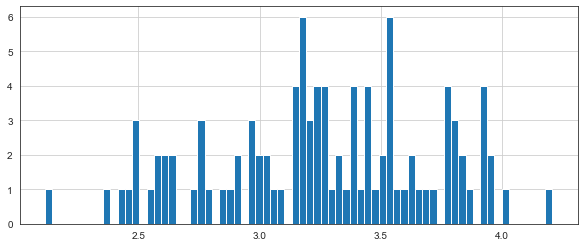

In [24]:
plt.figure(figsize=(10,4))
rating['rating'].hist(bins=70)

In [19]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
programming in c                               224
drupal 8 development cookbook                  213
computer organization and architecture :       209
c++ coding standards                           190
information technology project management :    137
Name: rating, dtype: int64

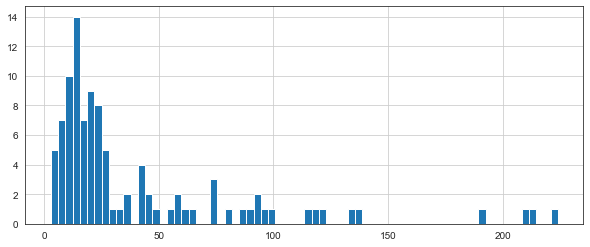

In [26]:
plt.figure(figsize=(10,4))
rating['num of ratings'].hist(bins=70)

In [20]:
df.head()

,userid,bookid,rating,title,category
0,1,1,4.0,programming in c,c|programming
1,5,1,4.0,programming in c,c|programming
2,7,1,4.5,programming in c,c|programming
3,15,1,2.5,programming in c,c|programming
4,17,1,4.5,programming in c,c|programming


In [21]:
rating = pd.DataFrame(df.groupby('title')['rating'].mean())
rating.head(100)

,rating
title,
adaptive filtering prediction and control,3.264706
advanced c++,3.455882
advanced database management system,3.961538
advanced internet technology,3.538462
agile web development with rails,3.785714
artificial intelligence :,2.600000
beginning android 4,3.200000
beginning phython,3.041667
business intelligence,2.454545


In [22]:
rating['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
rating.head(100)

,rating,num of ratings
title,,
adaptive filtering prediction and control,3.264706,17
advanced c++,3.455882,34
advanced database management system,3.961538,13
advanced internet technology,3.538462,26
agile web development with rails,3.785714,14
artificial intelligence :,2.600000,5
beginning android 4,3.200000,10
beginning phython,3.041667,24
business intelligence,2.454545,11


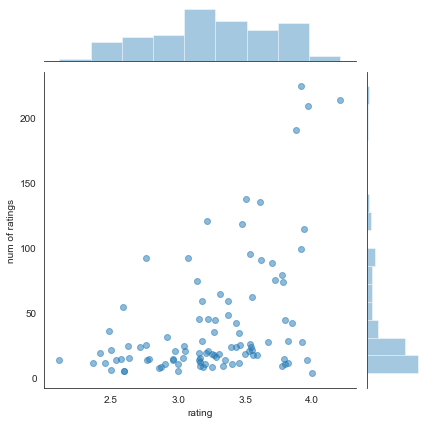

In [23]:
sns.jointplot(x='rating',y='num of ratings',data=rating,alpha=0.5)

In [27]:
bookmat = df.pivot_table(index='userid',columns='title',values='rating')
bookmat.head()

title,adaptive filtering prediction and control,advanced c++,advanced database management system,advanced internet technology,agile web development with rails,artificial intelligence :,beginning android 4,beginning phython,business intelligence,c & data structures,c++,c++ coding standards,c: the complete reference,clean code,cloud computing,code complete,communication networks:,computer graphics,computer networks,computer organization and architecture :,computer science,core java for the impatient,core python programming,cryptography and network security,data communication and networking,data mining,data structure using c,data structures,data warehousing,database management systems,database system concepts,database systems,digital design,discrete-event system simulation,distributed computing,distributed database systems,drupal 8 development cookbook,e-business and e-commerce management:,e-commerce,embedded/real-time systems,fundamentals of computer algorithms,fundamentals of database systems,game architecture and programming,head first java,information storage and management,information technology project management :,information theory coding and cryptography,introduction to algorithms,introduction to artificial neural systems,introduction to computing and problem solving using python,introduction to data compression,introduction to the theory of computation,java 2,java : the complete reference,java network programming,java programming from the group up,learn rails 5.2,learning ruby,let us c,let us java,linux labs and open source technologies,mastering c,microprocessors and interfacing :,microprocessors and interfacing programmng and hardware,"microprocessors architecture,programming, and applications with the 8085",mining of massive datasets,modern operating systems,"neural networks, fuzzy logic, and genetic algorithms :",object oriented programming methodology.,operating system concepts,operating systems,pattern classification,principles of soft computing,professional c++,programming in ansi c,programming in c,programming in java.,programming pearls,programming with c,programming with java,python projects,refactoring,ruby on rails 5.0 for autodidacts: learn ruby 2.3 and rails 5.0,ruby on rails tutorial: learn web development with rails,software engineering,software engineering: a practitioner's approach,systems programming,tactical seo: the theory and practice of search marketing,the 8051 microcontroller,the 8051 microcontroller and embedded systems :,the art of computer programming,the art of seo,the elements of java style,theoretical computer science,web engineering,web technologies,web technology,windows internals : user mode,wireless networks,wordpress seo success
userid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [28]:
rating.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
programming in c,3.919643,224
drupal 8 development cookbook,4.208920,213
computer organization and architecture :,3.966507,209
c++ coding standards,3.878947,190
information technology project management :,3.507299,137
cloud computing,3.611111,135
data structures,3.212500,120
database systems,3.478814,118
cryptography and network security,3.938596,114


In [29]:
rating.head(100)

,rating,num of ratings
title,,
adaptive filtering prediction and control,3.264706,17
advanced c++,3.455882,34
advanced database management system,3.961538,13
advanced internet technology,3.538462,26
agile web development with rails,3.785714,14
artificial intelligence :,2.600000,5
beginning android 4,3.200000,10
beginning phython,3.041667,24
business intelligence,2.454545,11


In [33]:
user_ratings1 = bookmat['advanced database management system']
user_ratings2 = bookmat['python projects']
user_ratings1.head()
user_ratings2.head()

userid
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: python projects, dtype: float64

In [34]:
similar1= bookmat.corrwith(user_ratings1)
similar2 = bookmat.corrwith(user_ratings2)

C:\Users\mailk\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\mailk\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [35]:
corr_1 = pd.DataFrame(similar1,columns=['Correlation'])
corr_1.dropna(inplace=True)
corr_1.head()

,Correlation
title,
advanced database management system,1.000000
agile web development with rails,-1.000000
c++ coding standards,0.523256
clean code,-0.207514
cloud computing,0.816497


In [36]:
corr_1.sort_values('Correlation',ascending=False).head(100)

,Correlation
title,
advanced database management system,1.000000
information theory coding and cryptography,1.000000
microprocessors and interfacing :,1.000000
object oriented programming methodology.,1.000000
web technologies,1.000000
game architecture and programming,1.000000
cloud computing,0.816497
tactical seo: the theory and practice of search marketing,0.755929
programming with java,0.755929


In [37]:
corr_1 = corr_1.join(rating['num of ratings'])
corr_1.head()

,Correlation,num of ratings
title,,
advanced database management system,1.000000,13
agile web development with rails,-1.000000,14
c++ coding standards,0.523256,190
clean code,-0.207514,28
cloud computing,0.816497,135


In [42]:
corr_2 = pd.DataFrame(similar2,columns=['Correlation'])
corr_2.dropna(inplace=True)
corr_2 = corr_2.join(rating['num of ratings'])
#corr_2[corr_2['num of ratings']>100].sort_values('Correlation',ascending=False).head(2)
corr_2.sort_values('Correlation',ascending=False).head(100)

,Correlation,num of ratings
title,,
python projects,1.0,5
computer networks,1.0,73
game architecture and programming,-1.0,44
the 8051 microcontroller,-1.0,42
